In [1]:
lincs generate classification-problem 2 2 \
  --forbid-real-criteria --allow-enumerated-criteria \
  --denormalized-min-max \
   --random-seed 520326314 >problem.yml
cat problem.yml

# Reproduction command (with lincs version 2.0.0a0): lincs generate classification-problem 2 2 --random-seed 520326314 --denormalized-min-max --forbid-real-criteria --allow-enumerated-criteria
kind: classification-problem
format_version: 1
criteria:
  - name: Criterion 1
    value_type: enumerated
    ordered_values: [bat, pit, bet, got, gut, tat, tuz]
  - name: Criterion 2
    value_type: enumerated
    ordered_values: [piz, bir]
ordered_categories:
  - name: Worst category
  - name: Best category


In [2]:
lincs describe classification-problem problem.yml

This a classification problem into 2 ordered categories named "Worst category" and "Best category".
The best category is "Best category" and the worst category is "Worst category".
There are 2 classification criteria (in no particular order).
Criterion "Criterion 1" takes values in the following set: bat, pit, bet, got, gut, tat, tuz.
The best value for criterion "Criterion 1" is "tuz" and the worst value is "bat".
Criterion "Criterion 2" takes values in the following set: piz, bir.
The best value for criterion "Criterion 2" is "bir" and the worst value is "piz".


In [3]:
lincs generate classification-model problem.yml --random-seed 564532967 >model.yml
cat model.yml

# Reproduction command (with lincs version 2.0.0a0): lincs generate classification-model problem.yml --random-seed 564532967 --model-type mrsort
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [tat]
  - kind: thresholds
    thresholds: [bir]
sufficient_coalitions:
  - kind: weights
    criterion_weights: [2.96190953, 0.452991337]


In [4]:
lincs describe classification-model problem.yml model.yml

This is a MR-Sort (a.k.a. 1-Uc-NCS) model: an NCS model where the sufficient coalitions are specified using the same criterion weights for all boundaries.
The weights associated to each criterion are:
  - Criterion "Criterion 1": 2.96
  - Criterion "Criterion 2": 0.45
To get into an upper category, an alternative must be better than the following profiles on a set of criteria whose weights add up to at least 1:
  - For category "Best category": at least "tat" on criterion "Criterion 1" and at least "bir" on criterion "Criterion 2"


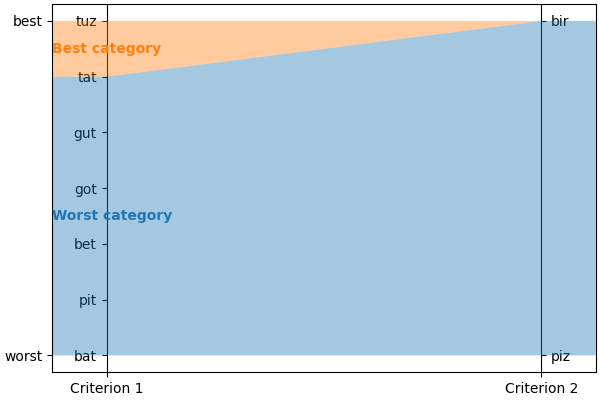

In [5]:
lincs visualize classification-model problem.yml model.yml - | display

In [6]:
lincs generate classified-alternatives problem.yml model.yml 100 --max-imbalance 0.1 --random-seed 992594045 >alternatives.csv
head -n 10 alternatives.csv

# Reproduction command (with lincs version 2.0.0a0): lincs generate classified-alternatives problem.yml model.yml 100 --random-seed 992594045 --max-imbalance 0.1 --misclassified-count 0
name,"Criterion 1","Criterion 2",category
"Alternative 1",tuz,piz,"Best category"
"Alternative 2",got,piz,"Worst category"
"Alternative 3",tat,piz,"Best category"
"Alternative 4",bat,bir,"Worst category"
"Alternative 5",bat,piz,"Worst category"
"Alternative 6",bet,bir,"Worst category"
"Alternative 7",bat,piz,"Worst category"
"Alternative 8",bat,piz,"Worst category"


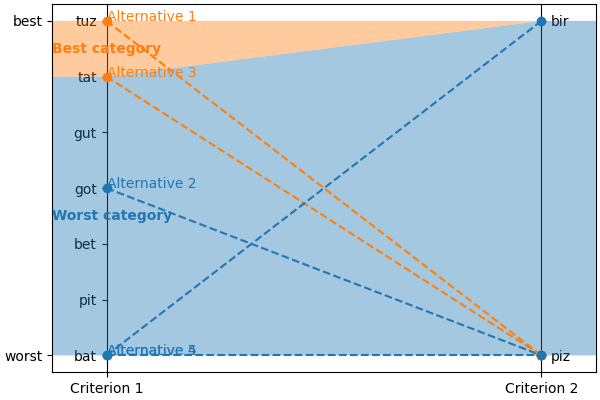

In [7]:
lincs visualize classification-model problem.yml model.yml - --alternatives alternatives.csv --alternatives-count 5 | display

In [8]:
lincs classification-accuracy problem.yml model.yml alternatives.csv

100/100


In [9]:
lincs learn classification-model problem.yml alternatives.csv --mrsort.weights-profiles-breed.accuracy-heuristic.random-seed 1022618183

# Reproduction command (with lincs version 2.0.0a0): lincs learn classification-model problem.yml alternatives.csv --model-type mrsort --mrsort.strategy weights-profiles-breed --mrsort.weights-profiles-breed.models-count 9 --mrsort.weights-profiles-breed.accuracy-heuristic.random-seed 1022618183 --mrsort.weights-profiles-breed.initialization-strategy maximize-discrimination-per-criterion --mrsort.weights-profiles-breed.weights-strategy linear-program --mrsort.weights-profiles-breed.linear-program.solver glop --mrsort.weights-profiles-breed.profiles-strategy accuracy-heuristic --mrsort.weights-profiles-breed.accuracy-heuristic.processor cpu --mrsort.weights-profiles-breed.breed-strategy reinitialize-least-accurate --mrsort.weights-profiles-breed.reinitialize-least-accurate.portion 0.5 --mrsort.weights-profiles-breed.target-accuracy 1.0
kind: ncs-classification-model
format_version: 1
accepted_values:
  - kind: thresholds
    thresholds: [tat]
  - kind: thresholds
    thresholds: [bir]
s